# Neural & Behavioral Modeling - Week 9 (Examples)
by Tsung-Ren (Tren) Huang (tren.huang@gmail.com)

In [92]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *
from time import sleep

## 1 Neural Computation

### 1.1 Logic Operations

In [93]:
# Supporting functions: -----------------------
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    # w*x = w dot x
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y
#----------------------------------------------

for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = AND(xs[0], xs[1]) # try AND, OR, NAND
    print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


### 1.2 Pattern Recognition

In [94]:
RETINA=matrix('0 0 0 0 0;0 0 1 0 0;0 1 1 1 0')
LGN_RF=matrix('0;-0.5;1;-0.5;0')
LGN_RESPONSE=RETINA*LGN_RF
print(LGN_RESPONSE)

[[ 0.]
 [ 1.]
 [ 0.]]


### 1.3 Perceptron w/o learning

-1
-1
1
1
1
0 <2  -2 4
1 <2  4 1
2 >=2  1 6
3 >=2  2 4
4 >=2  6 2


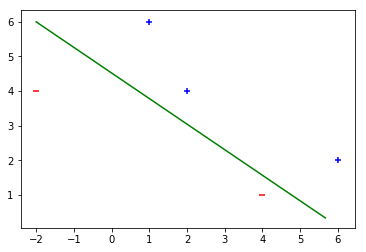

In [95]:
X = array([   #[x1,x2,bias]
    [-2,4, -1], 
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

y = array([-1,-1,1,1,1])

# The hyperplane:
w=[2, 3, 13] # w0x0+w1x1-w2=0 => x1=(w2-w0x0)/w1
y1=(w[2]-w[0]*(-2))/w[1] # y of the 1st point on the hyperplane: (-2, y1)
y2=(w[2]-w[0]*6)/w[1] # y of the 2nd point on the hyperplane: (6, y2)

# Testing:
for i, x in enumerate(X):
    print(sign(dot(x, w)))
    
# Ploting:
for i, x in enumerate(X): # samples
    if(i<2): 
        scatter(x[0],x[1],marker='_',color='r') # the first two points belong to "-"
        print(i, "<2 ",x[0], x[1] )
    else: 
        scatter(x[0],x[1],marker='+',color='b') # the last three points belong to "+"
        print(i, ">=2 ",x[0], x[1] )
plot([-2,y1],[6,y2],'g'); # the hyperplane

## 2 Unsupervised Learning

### 2.1 Hopfield Network

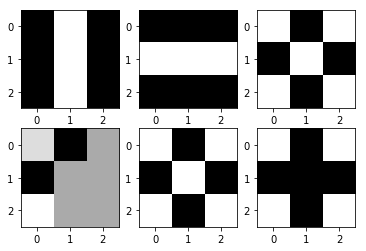

In [96]:
p=array([
    [-1,1,-1,-1,1,-1,-1,1,-1], # 3x3 pattern 1 # try replacing -1 to 0
    [-1,-1,-1,1,1,1,-1,-1,-1], # 3x3 pattern 2
    [1,-1,1,-1,1,-1,1,-1,1],   # 3x3 pattern 3
])

# generate a 9*9 matrix
w=zeros([9,9]);
for i in range(3):
    # make space for the plot
    subplot(2,3,i+1);
    imshow(p[i].reshape((3,3)),cmap='gray')
    w=w+outer(p[i],p[i]); # learning

# Retrieval cue:
subplot(2,3,4)
cue=array([0.3,-1,0,-1,0,0,0.5,0,0])
imshow(cue.reshape((3,3)),cmap='gray')

# Recalling:
for t in [2,3]:
    subplot(2,3,t+3);
    cue=matmul(w,cue)>0
    imshow(cue.reshape((3,3)),cmap='gray')

### 2.2 Instar/OutStar Learning

In [74]:
x=array([0,1,0])
W1=random.rand(3)
y=dot(W1,x) # Bottom-up F1→F2
for i in range(10): # trials 
    y=dot(W1,x) # Bottom-up F1→F2
    print(W1,y)
    W1+=y*(x-W1) # Postsynaptically gated InStar 

[ 0.326  0.604  0.064] 0.603500397394
[ 0.129  0.843  0.026] 0.842788065134
[ 0.02   0.975  0.004] 0.975284407536
[ 0.001  0.999  0.   ] 0.999389139489
[ 0.  1.  0.] 0.999999626849
[ 0.  1.  0.] 1.0
[ 0.  1.  0.] 1.0
[ 0.  1.  0.] 1.0
[ 0.  1.  0.] 1.0
[ 0.  1.  0.] 1.0


### 2.3 Self-Organizing Map

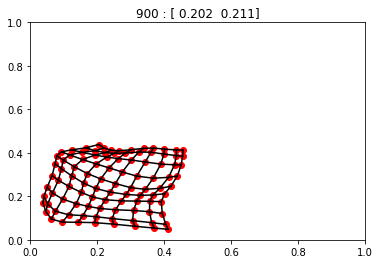

In [78]:
# 2D Kohonen SOM:
nn=10 # 10x10 neurons
lmbda=0.2 # learning rate
sig=4.0 # sigma of the neighbor function
[X,Y]=meshgrid(range(nn),range(nn)) # topoical coordiates (x,y) of neurons

# Initial preferred features (x,y)=(c1,c2):
c1=0.5-0.1*(random.rand(nn,nn)-0.5); # Xs of 10x10 neurons
c2=0.5-0.1*(random.rand(nn,nn)-0.5); # Ys of 10x10 neurons

# Training:
for t in range(1000):
    x=0.5*random.rand(2) # stimuli ranged in [0,0.5]x[0,0.5]
    r=exp(-(c1-x[0])**2-(c2-x[1])**2); # neurons' responses to stimuli
    yx=where(r==amax(r)) # who is the winner
    N=exp(-((X-yx[1][0])**2+(Y-yx[0][0])**2)/sig) # topological neighborhood function
    c1=c1+lmbda*N*(x[0]-c1); # Kohonen learning of inputs' Xs
    c2=c2+lmbda*N*(x[1]-c2); # Kohonen learning of inputs' Ys
    if(mod(t,100)==0): # Plot the grid of feature centers every 100 trials
        clf() # clear previous figure
        plot(c1,c2,'ro'); plot(c1,c2,'k'); plot(c1.T,c2.T,'k');
        axis([0,1,0,1]); title(str(t)+' : '+str(x))
        display(gcf()); clear_output(wait=True) # to allow dynamic plots

## 3. Supervised Learning

### 3.1 Perceptron w/ learning


-1.0
-1.0
1.0
1.0
1.0


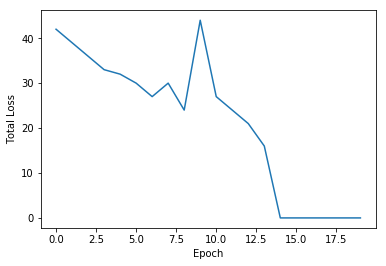

In [80]:
# Supporting functions: -----------------------
def sgd(X, Y): # Stochastic Gradient Descent
    w = zeros(len(X[0]))
    eta = 1 # learning rate
    epochs = 20 # number of training epochs
    errors = [] # error history during training
    for t in range(epochs):
        total_error = 0
        for p, x in enumerate(X): #p=pattern index
            if (dot(X[p], w)*Y[p]) <= 0:
                total_error += (dot(X[p], w)*Y[p])
                w = w + eta*X[p]*Y[p] # Supervised Hebbian learning!
        errors.append(total_error*-1)
    plot(errors); xlabel('Epoch'); ylabel('Total Loss')
    return w
#----------------------------------------------


X = array([   #[x1,x2,bias]
    [-2,4, -1], 
    [4,1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

y = array([-1,-1,1,1,1])

# Learning:
w = sgd(X,y)

# Testing:
for i, x in enumerate(X):
    print(sign(dot(X[i], w))) 


### 3.2 Delta Rule on a Two-layered Network w/o Bias Terms

#### 3.2.1 Linear activation function for continuous-valued outputs

In [119]:
# Here we train a two-layered network of units 
# with a linear activation function f(x)=x
# to associate patterns using the delta rule dW=(t-y)*x

set_printoptions(precision=3,suppress=True)

X=matrix('1 0 0 0;0 1 0 0;1 1 0 0;0 0 1 0;0 0 0 1;0 0 1 1')
Y=matrix('0.3 0;0.5 0;0.7 0;0 0.3;0 0.5;0 0.7') # try continuous values
#Y=matrix('1 0;1 0;1 0;0 1;0 1;0 1') # try binary values
[Np,Nx]=X.shape; # find numbers of patterns and input dimensions 
[Np,Ny]=Y.shape; # find numbers of patterns and output dimensions 
W=asmatrix(random.rand(Ny,Nx)); # set initially random connectivity matrix

In [120]:
X

matrix([[1, 0, 0, 0],
        [0, 1, 0, 0],
        [1, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 1]])

In [121]:
Y

matrix([[ 0.3,  0. ],
        [ 0.5,  0. ],
        [ 0.7,  0. ],
        [ 0. ,  0.3],
        [ 0. ,  0.5],
        [ 0. ,  0.7]])

In [122]:
W

matrix([[ 0.401,  0.277,  0.737,  0.532],
        [ 0.231,  0.236,  0.857,  0.681]])

X: 
 [[1 0 0 0]
 [0 1 0 0]
 [1 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 1 1]]
Y: 
 [[ 0.3  0. ]
 [ 0.5  0. ]
 [ 0.7  0. ]
 [ 0.   0.3]
 [ 0.   0.5]
 [ 0.   0.7]]
Y[p].T
 [[ 0.3]
 [ 0. ]]
Y[p]
 [[ 0.3  0. ]]
y: 
 [[ 0.845]
 [ 0.983]]
Y[p].T-y
 [[-0.545]
 [-0.983]]
Y[p].T
 [[ 0.5]
 [ 0. ]]
Y[p]
 [[ 0.5  0. ]]
y: 
 [[ 0.664]
 [ 0.608]]
Y[p].T-y
 [[-0.164]
 [-0.608]]
Y[p].T
 [[ 0.7]
 [ 0. ]]
Y[p]
 [[ 0.7  0. ]]
y: 
 [[ 1.438]
 [ 1.432]]
Y[p].T-y
 [[-0.738]
 [-1.432]]
Y[p].T
 [[ 0. ]
 [ 0.3]]
Y[p]
 [[ 0.   0.3]]
y: 
 [[ 0.776]
 [ 0.315]]
Y[p].T-y
 [[-0.776]
 [-0.015]]
Y[p].T
 [[ 0. ]
 [ 0.5]]
Y[p]
 [[ 0.   0.5]]
y: 
 [[ 0.921]
 [ 0.826]]
Y[p].T-y
 [[-0.921]
 [-0.326]]
Y[p].T
 [[ 0. ]
 [ 0.7]]
Y[p]
 [[ 0.   0.7]]
y: 
 [[ 1.527]
 [ 1.107]]
Y[p].T-y
 [[-1.527]
 [-0.407]]
Y[p].T
 [[ 0.3]
 [ 0. ]]
Y[p]
 [[ 0.3  0. ]]
y: 
 [[ 0.717]
 [ 0.742]]
Y[p].T-y
 [[-0.417]
 [-0.742]]
Y[p].T
 [[ 0.5]
 [ 0. ]]
Y[p]
 [[ 0.5  0. ]]
y: 
 [[ 0.574]
 [ 0.404]]
Y[p].T-y
 [[-0.074]
 [-0.404]]
Y[p].T
 [[ 0.7]
 [ 0. ]]
Y[p

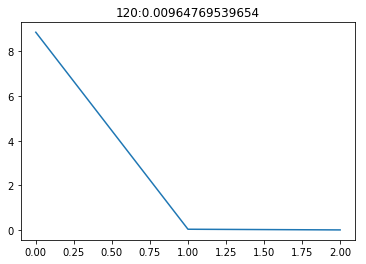

In [133]:
# Here we train a two-layered network of units 
# with a linear activation function f(x)=x
# to associate patterns using the delta rule dW=(t-y)*x

set_printoptions(precision=3,suppress=True)

X=matrix('1 0 0 0;0 1 0 0;1 1 0 0;0 0 1 0;0 0 0 1;0 0 1 1')
Y=matrix('0.3 0;0.5 0;0.7 0;0 0.3;0 0.5;0 0.7') # try continuous values
#Y=matrix('1 0;1 0;1 0;0 1;0 1;0 1') # try binary values
[Np,Nx]=X.shape; # find numbers of patterns and input dimensions 
[Np,Ny]=Y.shape; # find numbers of patterns and output dimensions 
W=asmatrix(random.rand(Ny,Nx)); # set initially random connectivity matrix

eta=.1; # set the learning rate # try 0.1
tol=1e-2; # set the tolerance/stopping criterion; try 0.01
nIts=50000; # set the maximum number of allowed iterations
totErr=10; # set the maximum training error to an initially high value
totErr_hist=[]

print("X: \n", X)
print("Y: \n", Y)

for c in range(nIts): # for each learning iteration
    p=mod(c,Np) # sequential presentation of the training samples
    #p=random.randint(nP); # choose pattern pair at random
    
    # Forward propagation:
#     print("W: \n", W)
#     print("X[p].T :\n", X[p].T)
    y=W*X[p].T
#     print("X[p].T: \n", X[p].T)
#     print("y: ", y)
#     print("dot: ", W.dot(X[p].T))
    
    # Backward propagation:
    print("Y[p].T\n", Y[p].T)
    print("Y[p]\n", Y[p])
    print("y: \n", y)
    print("Y[p].T-y\n", Y[p].T-y)
    deltaW=eta*outer(Y[p].T-y,X[p]) # delta learning
    W=W+deltaW;  # apply the weight update
    
    # Checking if done:
    if(mod(c,10*Np)==0): # after several updates check total errors
        predY=W*X.T # testing all the training samples
#         print(Y.T-predY)
#         print("Square: \n", multiply(Y.T-predY,Y.T-predY))
        totErr=sum(multiply(Y.T-predY,Y.T-predY)) # sum of squared errors for all samples
        totErr_hist.append(totErr)
    if(totErr<tol): # one training sample reaches stopping criterion
        break # break if max error is below tolerance
        
plot(totErr_hist);
title(str(c)+':'+str(totErr));
print(predY.T) # predicted Y

#### 3.2.2 Sigmoid activation function for binary-valued outputs

[[ 0.965  0.035]
 [ 0.965  0.035]
 [ 0.999  0.001]
 [ 0.035  0.965]
 [ 0.035  0.965]
 [ 0.001  0.999]]


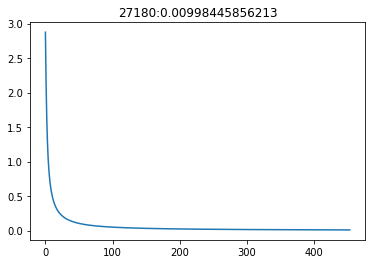

In [84]:
# Here we train a two-layered network of units 
# with the sigmoid/logistic activation function f
# to associate patterns using the delta rule dW=(t-y)*(df/dx)*x

set_printoptions(precision=3,suppress=True)

X=matrix('1 0 0 0;0 1 0 0;1 1 0 0;0 0 1 0;0 0 0 1;0 0 1 1')
Y=matrix('1 0;1 0;1 0;0 1;0 1;0 1')
#Y=matrix('0.3 0;0.5 0;0.7 0;0 0.3;0 0.5;0 0.7') # try continuous values
[Np,Nx]=X.shape; # find numbers of patterns and inputs 
[Np,Ny]=Y.shape; # find numbers of patterns and outputs 
W=asmatrix(random.rand(Ny,Nx)-0.5); # set initially random connectivity matrix

eta=0.1; # set the learning rate # try 0.1
tol=1e-2; # set the tolerance/stopping criterion; try 0.01
nIts=50000; # set the maximum number of allowed iterations
totErr=10; # set the maximum training error to an initially high value
totErr_hist=[]

for c in range(nIts): # for each learning iteration
    p=mod(c,Np) # sequential presentation of the training samples
    #p=random.randint(nP); # choose pattern pair at random
    
    # Forward propagation:
    y0=W*X[p].T
    y=1/(1+exp(-y0)) # activation function
    
    # Backward propagation:
    dy=multiply(y,1-y); # compute the derivative of the sigmoid function
    e=Y[p].T-y; # error e for the chosen input
    deltaW=eta*outer(multiply(e,dy),X[p])
    W=W+deltaW;  # apply the weight update
    
    # Checking if done:
    if(mod(c,10*Np)==0): # after several updates check maximum error
        h=W*X.T # testing all the training samples
        predY=1/(1+exp(-h))
        totErr=sum(multiply(Y.T-predY,Y.T-predY))
        totErr_hist.append(totErr)
    if(totErr<tol): # one training sample reaches stopping criterion
        break # break if max error is below tolerance

plot(totErr_hist);
title(str(c)+':'+str(totErr));
print(predY.T) # predicted Y

### 3.3 Backpropagation on a Three-layered Network w/ Bias Terms

In [87]:
# Here we train a three-layered network of units 
# with the sigmoid/logistic activation function f
# to associate patterns using backpropagation

set_printoptions(precision=3,suppress=True)

X=array([[1,0,0,0],[0,1,0,0],[1,1,0,0],[0,0,1,0],[0,0,0,1],[0,0,1,1]])
Z=array([[1,0],[1,0],[1,0],[0,1],[0,1],[0,1]])
[Np,Nx]=X.shape; # find numbers of patterns and inputs 
[Np,Nz]=Z.shape; # find numbers of patterns and outputs 
U=random.rand(nHid,Nx+1) # set initial input-hidden connectivity matrix
V=random.rand(Nz,nHid+1) # set initial hidden-output connectivity matrix

eta=0.1; # set the learning rate
tol=1e-2; # set the tolerance/stopping criterion; try 0.01
nIts=50000; # set the maximum number of allowed iterations
nHid=1; # set the number of hidden units # try 2
totErr=10; # set the maximum training error to an initially high value
totErr_hist=[]

for c in range(nIts): # for each learning iteration
    p=mod(c,Np) # sequential presentation of the training samples
    #p=random.randint(nP); # choose pattern pair at random
    
    # Forward propagation:
    x=append(X[p],1) # adding the bias term
    y0=1/(1+exp(-dot(U,x))) # compute the hidden unit response
    y=append(y0,1) # adding the bias term
    z=1/(1+exp(-dot(V,y))) # compute the output unit response
    e=Z[p]-z # error e for the chosen input
    
    # Backward propagation:
    zg=e*(z*(1-z)) # compute the output error signal
    yg=y*(1-y)*dot(zg,V) # compute hidden error signal
    deltaV=eta*outer(zg,y); # compute the change in hidden-output weights
    deltaU=eta*outer(yg[0:-1],x) # compute change in input-hidden weights
    V=V+deltaV; # update the hidden-output weights
    U=U+deltaU; # update the input-hidden weights       
    
    # Checking if done:
    if(mod(c,10*Np)==0): # every so often check network performance
        x=hstack([X,ones([Np,1])]) # append bias to all input patterns
        y0=1/(1+exp(-dot(x,U.T))) # compute the hidden unit response
        y=hstack([y0,ones([Np,1])]) # adding the bias term
        z=1/(1+exp(-dot(y,V.T))) # compute the output unit response
        totErr=sum((Z-z)**2); # total squared error over all patterns
        totErr_hist.append(totErr)
    if(totErr<tol): 
        break # break if the total errors within tolerance

plot(totErr_hist);
title(str(c)+':'+str(totErr));
print(z) # predicted Z

NameError: name 'nHid' is not defined

## 4. Reinforcement Learning

### 4.1 Temporal Difference Learning

In [88]:
# Simulating the DA neuron responses:

a=0.3 # set learning rate
r=0.9 # temporal discounting
nTrials=200; # set number of trials
nTimes=50; # set number of time steps per trial
qTime=15; # set time of cue
rTime=25; # set time of reward

X=zeros(nTimes) # input vector 
X[qTime:rTime]=1 # binary status: 0=None; 1=Yes
#X[qTime]=1 % need memory trace to work
R=zeros(nTimes)  # reward vector
R[rTime]=1 # binary status: 0=None; 1=Yes
V=zeros(nTimes) # value function V(X(t))
TDe=zeros(nTimes) # define prediction unit vector
V_history=zeros([nTrials,nTimes])
TDe_history=zeros([nTrials,nTimes])

for c in range(nTrials): # for each learning trial
    if(c==nTrials/2): R[rTime]=0 # remove reward for later trials
    for t in range(1,nTimes):
        TDe[t]=R[t]+r*V[t]-V[t-1] # TD error
        V[t-1]=V[t-1]+a*X[t-1]*TDe[t] # TD learning: V(X(t))
        #V[t-1]=V[t-1]+a*TDe[t] # TD learning: V(t)
    V_history[c,:]=V # save learned V(t) across trials
    TDe_history[c,:]=TDe # save learned TDe(t) across trials

# plot the results:
fig1=figure()
ax1=fig1.add_subplot(111, projection='3d')
[X,Y]=meshgrid(range(nTimes),range(nTrials))
ax1.plot_surface(X,Y,V_history,cmap=cm.coolwarm)
xlabel('Time Step');ylabel('trial');
title('Anticipated Reward: V(t,x)');

fig2=figure(2);
ax2=fig2.add_subplot(111, projection='3d')
ax2.plot_surface(X,Y,TDe_history,cmap=cm.coolwarm)
xlabel('Time Step');ylabel('Trial')
title('TD error: TDe(t)');

ValueError: Unknown projection '3d'

### 4.2 Q Learning
See "<a href="http://mnemstudio.org/path-finding-q-learning-tutorial.htm">A Painless Q-Learning Tutorial</a>" for more information.

In [89]:
# Reward matrix
R = matrix([[-1,-1,-1,-1,0,-1],
           [-1,-1,-1,0,-1,100],
           [-1,-1,-1,0,-1,-1],
           [-1,0,0,-1,0,-1],
           [-1,0,0,-1,-1,100],
           [-1,0,-1,-1,0,100]])

# Q matrix
Q = matrix(np.zeros([6,6]))

# Gamma (learning parameter).
gamma = 0.8

# Initial state. (Usually to be chosen at random)
initial_state = 1

# This function returns all available actions in the state given as an argument
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

# Get available actions in the current state
available_act = available_actions(initial_state) 

# This function chooses at random which action to be performed within the range 
# of all the available actions.
def sample_next_action(available_actions_range):
    next_action = int(random.choice(available_act,1))
    return next_action

# Sample next action to be performed
action = sample_next_action(available_act)

# This function updates the Q matrix according to the path selected and the Q 
# learning algorithm
def update(current_state, action, gamma):
    
    max_index = where(Q[current_state,] == max(Q[current_state,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[current_state, max_index]
    
    # Q learning formula with the learning rate a=1
    Q[current_state, action] = R[current_state, action] + gamma * max_value

# Update Q matrix
update(initial_state,action,gamma)

#-------------------------------------------------------------------------------
# Training

# Train over 10000 iterations. (Re-iterate the process above).
for i in range(10000):
    current_state = random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    update(current_state,action,gamma)
    
# Normalize the "trained" Q matrix
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

#-------------------------------------------------------------------------------
# Testing

# Goal state = 5
# Best sequence path starting from 2 -> 2, 3, 1/4, 5

current_state = 2
steps = [current_state]

while current_state != 5:

    next_step_index = where(Q[current_state,] == max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

# Print selected sequence of steps
print("Selected path:")
print(steps)

Trained Q matrix:
[[   0.       0.       0.       0.       0.       0.   ]
 [   0.       0.       0.       0.       0.     100.   ]
 [   0.       0.       0.       0.       0.       0.   ]
 [   0.       0.       0.       0.       0.       0.   ]
 [   0.       0.       0.       0.       0.      60.976]
 [   0.       0.       0.       0.       0.      60.976]]
Selected path:
[2, 3, 5]


## 5. NumPy vs. PyTorch

### 5.1 Activation Histogram in NumPy

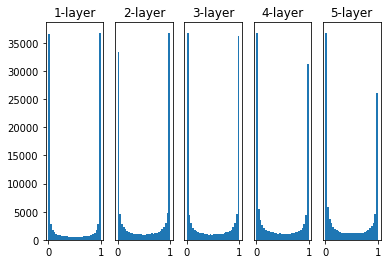

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Supporting functions: -----------------------
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ReLU(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)
#----------------------------------------------

input_data = np.random.randn(1000, 100)  
node_num = 100  
hidden_layer_size = 5  
activations = {}
x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # Testing different initial weights:
    w = np.random.randn(node_num, node_num) * 1 # vanishing gradients
    #w = np.random.randn(node_num, node_num) * 0.01 # little variance
    #w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num) # Xavier for symmetric functions
    #w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num) # He for ReLU

    a = np.dot(x, w)

    # Testing different activation functions:
    z = sigmoid(a)
    #z = ReLU(a)
    #z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    subplot(1, len(activations), i+1)
    title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    hist(a.flatten(), 30, range=(0,1))

### 5.2 Activation Histogram in PyTorch

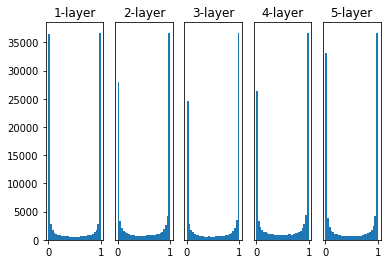

In [91]:
import torch as t

# Supporting functions: -----------------------
def sigmoid(x):
    return 1 / (1 + t.exp(-x))
    #return 1 / (1 + np.exp(-x))

def ReLU(x):
    return t.max(0, x)
    #return np.maximum(0, x)

def tanh(x):
    return t.tanh(x)
    #return np.tanh(x)
#----------------------------------------------

input_data = t.randn(1000, 100)  
node_num = 100  
hidden_layer_size = 5  
activations = {}  

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
     
    # Testing different initial weights:
    w = t.randn(node_num, node_num) * 1
    #w = np.random.randn(node_num, node_num) * 1 # vanishing gradients
    #w = np.random.randn(node_num, node_num) * 0.01 # little variance
    #w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num) # Xavier for tanh
    #w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num) # He for ReLU

    a=t.mm(x,w)
    #a = np.dot(x, w)

    # Testing different activation functions:
    z = sigmoid(a)
    #z = ReLU(a)
    #z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    subplot(1, len(activations), i+1)
    title(str(i+1) + "-layer")
    if i != 0: yticks([], [])
    #print(a.view(a.numel()))
    hist(a.numpy().flatten(), 30, range=(0,1))
    #hist(a.flatten(), 30, range=(0,1))